In [3]:
from pathlib import Path
import pygimli as pg  # Stelle sicher, dass das Modul pg importiert ist und verfügbar ist
from pygimli.physics import ert
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime
import os
import numpy as np

from Hilfsfunktionen import T_corr_nach_Inversion
from Hilfsfunktionen import plotting_function
from Hilfsfunktionen import plotting_function_FTL

results_tl_light = [] 
results_tl_light_Tcorr = []
chi2_oT = []
rrms_oT = []
chi2_wT = []
rrms_wT = []
for lam, nr in zip([10, 50, 100, 200], [0,1,2,3]):
    file = "two_timesteps_240710_240808.ohm"
    two_timesteps = True
    base_dir = Path("filtered_data")
    data = []
    for unterordner in base_dir.iterdir():
        if unterordner.is_dir():
            datei_pfad = unterordner / "two_timesteps_240710_240808.ohm" 
            if datei_pfad.exists():
                daten_objekt = pg.load(str(datei_pfad))
                data.append([unterordner.name, daten_objekt])
                print(f"Load data: {datei_pfad}")
    # Create method manager
    manager = []
    for ts in data:
        manager.append(ert.ERTManager(ts[1], verbose=True))
    
    # Inversion without Tcorr
    chi2 = []
    for mgr,mgr_number in zip(manager, range(len(manager))):
        if mgr_number > 0:
            results_tl_light.append(mgr.invert(mgr.data, quality=34,paraMaxCellSize=0.5,
                        paraDepth=15,lam=lam, dPhi= 0.1, startModel=results_tl_light[mgr_number-1], isReference = True))
            chi2.append(round(mgr.inv.chi2(),2))
            
        else:
            results_tl_light.append(mgr.invert(mgr.data, quality=34,paraMaxCellSize=0.5, 
                                         dPhi= 0.1, paraDepth=15,lam=15)) 
            chi2.append(round(mgr.inv.chi2(),2))
    chi2_oT.append(chi2)

    # Temperature correction
    ort_2 = 'Georg-Westermann-Park'
    results_tl_light_corr = [] 
    temp_spread = []
    timestep = 0
    mesh2 = manager[0].mesh.createSubMesh(manager[0].mesh.cells(manager[0].mesh.cellMarkers() == 2))
    for count, m in enumerate(results_tl_light):
        if two_timesteps:
            add = 10
        else:
            add = 0
        timestep = count+add
        dateien = os.listdir(r".\Temperature_data/" + ort_2 )
        for datei in dateien: 
            if (datei).startswith('T_Profil%s_array' % (str(timestep))):
                print(datei)
                Temp_tiefe_vektor = np.load(r'.\Temperature_data/%s/' % (ort_2) + datei, allow_pickle=True)
        res_new,Tem_new = T_corr_nach_Inversion(m, mesh2, Temp_tiefe_vektor)
        results_tl_light_corr.append(res_new) 
        temp_spread.append(Tem_new)

    for resu, resu_corr, man, wen in zip(results_tl_light,results_tl_light_corr,manager, data):
        response = man.inv.fop.response(resu)
        response_t_corr = man.inv.fop.response(resu_corr)
        difference = response_t_corr - response
        wen[1]['rhoa'] = wen[1]['rhoa'] + difference
    for dat in data:
        dat[1].remove(dat[1]['rhoa']<0)
    # Inversion with temperature correction
    chi2 = []
    for mgr,mgr_number in zip(manager, range(len(manager))):
        if mgr_number > 0:
            results_tl_light_Tcorr.append(mgr.invert(mgr.data, quality=34,paraMaxCellSize=0.5,
                        paraDepth=15,lam=lam, dPhi= 0.1, startModel=results_tl_light_Tcorr[mgr_number-1], isReference = True))
            chi2.append(round(mgr.inv.chi2(),2))
        else:
            results_tl_light_Tcorr.append(mgr.invert(mgr.data, quality=34,paraMaxCellSize=0.5, 
                                         dPhi= 0.1, paraDepth=15,lam=15)) 
            chi2.append(round(mgr.inv.chi2(),2))
    chi2_wT.append(chi2)
    

Load data: filtered_data\240710\two_timesteps_240710_240808.ohm
Load data: filtered_data\240808\two_timesteps_240710_240808.ohm


24/04/25 - 03:17:04 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 03:17:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 03:17:05 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 03:17:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 03:17:05 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 03:17:05 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 03:17:06 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 03:17:06 - pyGIMLi - INFO - Use median(data values)=2043.9
24/04/25 - 03:17:06 - pyGIMLi - INFO - Created startmodel from forward operator: 3104, min/max=2043.900000/2043.900000
24/04/25 - 03:17:06 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000276B12528E0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000276B128A930>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000276B12524D0>
min/max (data): 65.6/6396
min/max (error): 3%/3.02%
min/max (start model): 2044/2044
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1125.22
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   34.63 (dPhi = 96.25%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   25.77 (dPhi = 24.93%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   20.06 (dPhi = 21.34%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   16.00 (dPhi = 19.20%) lam: 15.0
-------------

24/04/25 - 03:26:33 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 03:26:33 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 03:26:33 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 03:26:33 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 03:26:33 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 03:26:33 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 03:26:34 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 03:26:34 - pyGIMLi - INFO - Starting inversion.
24/04/25 - 03:26:34 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000276B12898A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000276B128B790>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000276B128A340>
min/max (data): 75.9/5324
min/max (error): 3%/3.01%
min/max (start model): 13.74/9136
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   36.25
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.02 (dPhi = 96.73%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    0.78 (dPhi = 19.93%) lam: 10.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.78)                   #
################################################################################
T_Profil10_array_array_2024-07-10-11H_5.9

24/04/25 - 03:29:15 - pyGIMLi - INFO - Use median(data values)=1503.7011735937526
24/04/25 - 03:29:15 - pyGIMLi - INFO - Created startmodel from forward operator: 3104, min/max=1503.701174/1503.701174
24/04/25 - 03:29:15 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000276B12528E0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000276B128A930>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000276B12524D0>
min/max (data): 38.14/5121
min/max (error): 3%/3.02%
min/max (start model): 1504/1504
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1235.40
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   42.45 (dPhi = 95.90%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   31.06 (dPhi = 26.24%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   23.82 (dPhi = 22.51%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   18.78 (dPhi = 20.15%) lam: 15.0
------------

24/04/25 - 03:37:32 - pyGIMLi - INFO - Starting inversion.
24/04/25 - 03:37:32 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    2.44 (dPhi = 0.04%) lam: 15.0
################################################################################
#                Abort criterion reached: dPhi = 0.04 (< 0.1%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000276B12898A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000276B128B790>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000276B128A340>
min/max (data): 45.88/4403
min/max (error): 3%/3.01%
min/max (start model): 8.57/7318
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   32.99
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.61 (dPhi = 94.49%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.35 (dPhi = 14.06%) lam: 10.0
---

24/04/25 - 03:40:17 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 03:40:17 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 03:40:17 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 03:40:17 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 03:40:17 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 03:40:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 03:40:18 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 03:40:19 - pyGIMLi - INFO - Use median(data values)=2043.9
24/04/25 - 03:40:19 - pyGIMLi - INFO - Created startmodel from forward operator: 3104, min/max=2043.900000/2043.900000
24/04/25 - 03:40:19 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000276B1250720>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000276B1288BD0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000276B1252D90>
min/max (data): 65.6/6396
min/max (error): 3%/3.02%
min/max (start model): 2044/2044
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1125.22
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   34.64 (dPhi = 96.25%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   25.79 (dPhi = 24.92%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   20.06 (dPhi = 21.36%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   15.99 (dPhi = 19.23%) lam: 15.0
-------------

24/04/25 - 03:49:10 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 03:49:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 03:49:11 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 03:49:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 03:49:11 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 03:49:11 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 03:49:11 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 03:49:11 - pyGIMLi - INFO - Starting inversion.
24/04/25 - 03:49:11 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000276B1288220>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000276B128AB10>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000276B1288680>
min/max (data): 75.9/5324
min/max (error): 3%/3.01%
min/max (start model): 13.74/9136
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   36.25
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.17 (dPhi = 95.86%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    0.98 (dPhi = 11.44%) lam: 50.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.98)                   #
################################################################################
T_Profil10_array_array_2024-07-10-11H_5.9

24/04/25 - 03:50:54 - pyGIMLi - INFO - Use median(data values)=1503.7011735937526
24/04/25 - 03:50:54 - pyGIMLi - INFO - Created startmodel from forward operator: 3104, min/max=1503.701174/1503.701174
24/04/25 - 03:50:54 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000276B1250720>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000276B1288BD0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000276B1252D90>
min/max (data): 38.14/5121
min/max (error): 3%/3.02%
min/max (start model): 1504/1504
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1235.40
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   42.45 (dPhi = 95.90%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   31.04 (dPhi = 26.26%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   23.82 (dPhi = 22.48%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   18.78 (dPhi = 20.14%) lam: 15.0
------------

24/04/25 - 03:59:25 - pyGIMLi - INFO - Starting inversion.
24/04/25 - 03:59:25 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    2.44 (dPhi = 0.04%) lam: 15.0
################################################################################
#                Abort criterion reached: dPhi = 0.04 (< 0.1%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000276B1288220>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000276B128AB10>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000276B1288680>
min/max (data): 45.88/4403
min/max (error): 3%/3.01%
min/max (start model): 8.57/7318
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   32.99
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.80 (dPhi = 93.41%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.61 (dPhi = 7.99%) lam: 50.0
----

24/04/25 - 04:01:24 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 04:01:24 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 04:01:24 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 04:01:24 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 04:01:24 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 04:01:24 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 04:01:25 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 04:01:25 - pyGIMLi - INFO - Use median(data values)=2043.9
24/04/25 - 04:01:25 - pyGIMLi - INFO - Created startmodel from forward operator: 3104, min/max=2043.900000/2043.900000
24/04/25 - 04:01:25 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000276B1252250>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000276B128A340>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000276B1288BD0>
min/max (data): 65.6/6396
min/max (error): 3%/3.02%
min/max (start model): 2044/2044
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1125.22
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   34.67 (dPhi = 96.25%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   25.81 (dPhi = 24.90%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   20.09 (dPhi = 21.35%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   16.01 (dPhi = 19.23%) lam: 15.0
-------------

24/04/25 - 04:09:45 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 04:09:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 04:09:45 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 04:09:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 04:09:45 - pyGIMLi - INFO - Creating forward mesh from region infos.


chi² =    1.41 (dPhi = 0.03%) lam: 15.0
################################################################################
#                Abort criterion reached: dPhi = 0.03 (< 0.1%)                 #
################################################################################


24/04/25 - 04:09:45 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 04:09:46 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 04:09:46 - pyGIMLi - INFO - Starting inversion.
24/04/25 - 04:09:46 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000276B128BAB0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000276B1223420>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000276B128B380>
min/max (data): 75.9/5324
min/max (error): 3%/3.01%
min/max (start model): 13.74/9136
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   36.25
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.29 (dPhi = 95.09%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.10 (dPhi = 8.65%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.10 (dPhi = -0.00%) lam: 100.0
################################################################################
#                Abort criterion reached: dPhi = -0.0 (< 0.1%)    

24/04/25 - 04:12:51 - pyGIMLi - INFO - Use median(data values)=1503.7011735937526
24/04/25 - 04:12:51 - pyGIMLi - INFO - Created startmodel from forward operator: 3104, min/max=1503.701174/1503.701174
24/04/25 - 04:12:51 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000276B1252250>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000276B128A340>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000276B1288BD0>
min/max (data): 38.14/5121
min/max (error): 3%/3.02%
min/max (start model): 1504/1504
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1235.40
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   42.52 (dPhi = 95.89%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   31.10 (dPhi = 26.25%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   23.86 (dPhi = 22.49%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   18.81 (dPhi = 20.15%) lam: 15.0
------------

24/04/25 - 04:20:44 - pyGIMLi - INFO - Starting inversion.
24/04/25 - 04:20:44 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    2.44 (dPhi = 0.04%) lam: 15.0
################################################################################
#                Abort criterion reached: dPhi = 0.04 (< 0.1%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000276B128BAB0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000276B1223420>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000276B128B380>
min/max (data): 45.88/4403
min/max (error): 3%/3.01%
min/max (start model): 8.57/7318
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   32.99
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.94 (dPhi = 92.47%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.75 (dPhi = 6.09%) lam: 100.0
--

24/04/25 - 04:22:10 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 04:22:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 04:22:10 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 04:22:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 04:22:10 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 04:22:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 04:22:11 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 04:22:11 - pyGIMLi - INFO - Use median(data values)=2043.9
24/04/25 - 04:22:11 - pyGIMLi - INFO - Created startmodel from forward operator: 3104, min/max=2043.900000/2043.900000
24/04/25 - 04:22:11 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000276B128A340>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000276B1288220>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000276B128B790>
min/max (data): 65.6/6396
min/max (error): 3%/3.02%
min/max (start model): 2044/2044
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1125.22
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   34.63 (dPhi = 96.25%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   25.77 (dPhi = 24.94%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   20.06 (dPhi = 21.33%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   15.99 (dPhi = 19.22%) lam: 15.0
-------------

24/04/25 - 04:28:30 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 04:28:30 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 04:28:30 - pyGIMLi - INFO - Found 2 regions.
24/04/25 - 04:28:30 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/04/25 - 04:28:30 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/04/25 - 04:28:30 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/04/25 - 04:28:31 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8540 Cells: 16788 Boundaries: 12736
24/04/25 - 04:28:31 - pyGIMLi - INFO - Starting inversion.
24/04/25 - 04:28:31 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000276B12882C0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000276B1289760>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000276B128B920>
min/max (data): 75.9/5324
min/max (error): 3%/3.01%
min/max (start model): 13.74/9136
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   36.25
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    1.45 (dPhi = 93.88%) lam: 200.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.27 (dPhi = 6.16%) lam: 200.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.27 (dPhi = -0.00%) lam: 200.0
################################################################################
#                Abort criterion reached: dPhi = -0.0 (< 0.1%)    

24/04/25 - 04:30:54 - pyGIMLi - INFO - Use median(data values)=1503.7011735937526
24/04/25 - 04:30:54 - pyGIMLi - INFO - Created startmodel from forward operator: 3104, min/max=1503.701174/1503.701174
24/04/25 - 04:30:54 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000276B128A340>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000276B1288220>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000276B128B790>
min/max (data): 38.14/5121
min/max (error): 3%/3.02%
min/max (start model): 1504/1504
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1235.40
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   42.45 (dPhi = 95.90%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   31.05 (dPhi = 26.25%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   23.82 (dPhi = 22.49%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   18.78 (dPhi = 20.16%) lam: 15.0
------------

24/04/25 - 04:37:27 - pyGIMLi - INFO - Starting inversion.
24/04/25 - 04:37:27 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    2.43 (dPhi = 0.37%) lam: 15.0
--------------------------------------------------------------------------------
inv.iter 12 ... chi² =    2.44 (dPhi = 0.04%) lam: 15.0
################################################################################
#                Abort criterion reached: dPhi = 0.04 (< 0.1%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000276B12882C0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000276B1289760>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000276B128B920>
min/max (data): 45.88/4403
min/max (error): 3%/3.01%
min/max (start model): 8.57/7318
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   32.99
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.12 (dPhi = 91.03%) lam: 200.0
--

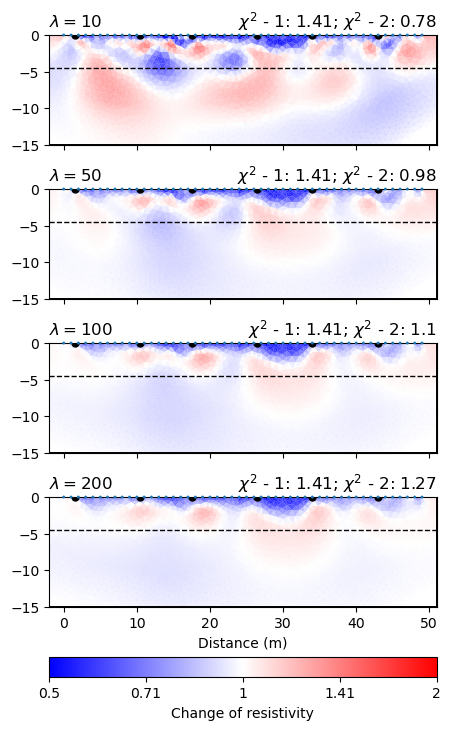

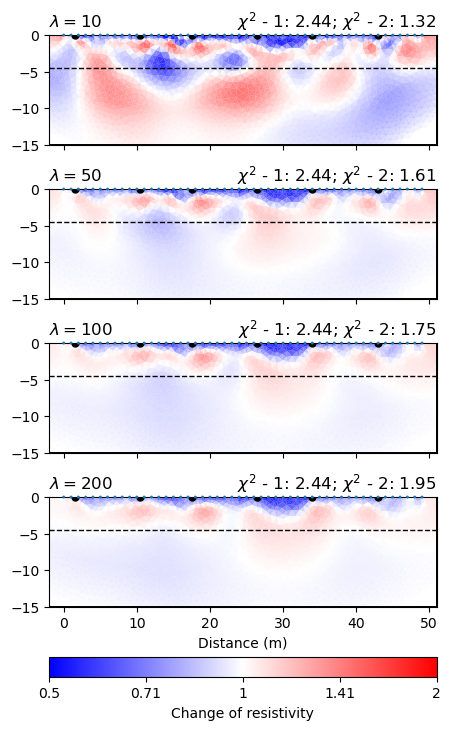

In [7]:
# Visualization for fig 7,8
for chi2, m, name in zip([chi2_oT, chi2_wT], [results_tl_light, results_tl_light_Tcorr], ['withoutTcorr', 'withTcorr']):
    fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(5, 4*2.5))
    plt.subplots_adjust(hspace=-0.5)
    for nr, model_nr, lam in zip([0,1,2,3],[0,2,4,6], [10,50,100,200]):
        ratio = m[model_nr+1] / m[model_nr]
        bild2 = manager[0].showResult(model= ratio,coverage = manager[0].coverage(),
                cMin=1/2, cMax=2, cMap= 'bwr', ax= axs[nr], label = 'Change of resistivity', logScale= True)
        if nr < 3:
            cb = bild2[-1]
            cb.remove() 
            axs[nr].xaxis.set_ticklabels([])  # Unterdrückt die x-Achse Labels
        if nr == 3:
            axs[nr].set_xlabel('Distance (m)')
            
        axs[nr].set_title('$\chi^2$ - 1: '+ str(chi2[nr][0]) + '; $\chi^2$ - 2: ' + str(chi2[nr][1]), loc = 'right')
        axs[nr].set_title('$\lambda = $'+ str(lam), loc = 'left')
        # Prinzenpark
        axs[nr].plot(1.5,0, '.', markersize = '10', color = 'black')
        axs[nr].plot(10.5,0, '.', markersize = '10', color = 'black')
        axs[nr].plot(17.5,0, '.', markersize = '10', color = 'black')
        axs[nr].plot(26.5,0, '.', markersize = '10', color = 'black')
        axs[nr].plot(34,0, '.', markersize = '10 ', color = 'black')
        axs[nr].plot(43,0, '.', markersize = '10 ', color = 'black')
        axs[nr].set_ylim(-15, 0)
        axs[nr].axhline(y=-4.5, color='k', linewidth = 1,linestyle='--')
    
    fig.savefig('./Fig7_8/Ref_Lam15_%s_Fehler3.png' % name, bbox_inches = 'tight', dpi=300)